In [4]:
using Parameters
using Statistics
using Distributions
using Plots
using StatsPlots

# Standard library
using Random

In [1]:
include("src/botmarket.jl")
using .BotMarket

In [2]:
world = ExternalWorld()

stock = generic_stock
investors = [
    ZeroIntelligentInvestor(Dict(generic_currency=>500, generic_stock=>200), min=20, max=50)
    for i in 1:100
]
markets = [ContinuousDoubleAuctionMarket() for i in 1:1]

for day in 1:100
    # Trading day

    for investor in investors, market in markets
        place!(investor, market)
    end
    update!(world)
    
    for market in markets
        cancel_all!(market)
    end

end


23.3851387596209220.35


InexactError: InexactError: Int64(200.5)

In [9]:
rand(1:Int(5))

3

In [7]:
mean([2,3])

2.5

In [5]:
BotMarket.get_order(investors[1], markets[1])

UndefVarError: UndefVarError: order not defined

In [10]:
rand(0,1)

0×1 Array{Float64,2}

In [5]:
isnan(markets[1].last_price)

true

In [7]:
for i in 1:1
    print(i)
end

1

In [4]:
ExternalWorld()

ExternalWorld(0)

In [4]:
Dict(:x -> 5)

ErrorException: syntax: ":x" is not a valid function argument name

In [3]:
generic_currency = RandomWalkCurrency(0, 0, 0, 0)

RandomWalkCurrency(0.0, 0.0, 0.0, 0.0)

In [4]:
RandomWalkCurrency

UndefVarError: UndefVarError: RandomWalkCurrency not defined

In [2]:
ContinuousDoubleAuctionMarket(RandomWalkStock(0, 0, 0, 0))

ContinuousDoubleAuctionMarket(RandomWalkStock(0.0, 0.0, 0.0, 0.0), RandomWalkCurrency(0.0, 0.0, 0.0, 0.0), NaN, SellLimitOrder[], BuyLimitOrder[])

In [8]:
mutable struct Test
    asset::Int64
    currency::Int64
    last_price::Int64
    sell_limit_orders::Int64
    buy_limit_orders::Int64

    function Test(asset::Int64)
        new(1, x, 3, 4, asset)
    end
end

In [ ]:
mutable struct Test2
    asset::AbstractAsset
    currency::AbstractCurrency
    last_price::Float64
    sell_limit_orders::Array{SellLimitOrder, 1}
    buy_limit_orders::Array{BuyLimitOrder, 1}

    function Test2(asset::AbstractAsset)
        new(asset, generic_currency, NaN, Array{SellLimitOrder, 1}(), Array{BuyLimitOrder, 1}())
    end
end

In [4]:
typeof(NaN)

Float64

In [5]:
Array{SellLimitOrder, 1}()

0-element Array{SellLimitOrder,1}

In [13]:
Test(6)

Test(1, 10, 3, 4, 6)

In [12]:
x = 10

10

In [6]:
RandomWalkStock(0, 0, 0, 0)

RandomWalkStock(0.0, 0.0, 0.0, 0.0)

In [5]:
ExternalWorld(5)

ExternalWorld(5)

In [37]:
mutable struct ContinuousDoubleAuctionMarketZ
    last_price::Float64

    function ContinuousDoubleAuctionMarketZ()
        new()
    end
end

In [39]:
ContinuousDoubleAuctionMarketZ()

ContinuousDoubleAuctionMarketZ(1.68686956e-315)

In [32]:
MyStruct()

MyStruct(5, 5)

In [2]:
ContinuousDoubleAuctionMarket(RandomWalkStock(5.4, 2.3, 2.3, 5.5))

ArgumentError: ArgumentError: new: too many arguments (expected 5)

In [25]:
RandomWalkStock(5.4, 2.3, 2.3, 5.5)

RandomWalkStock(5.4, 2.3, 2.3, 5.5)

In [11]:
[ContinuousDoubleAuctionMarket("as") for i in 1:3]

MethodError: MethodError: no method matching ContinuousDoubleAuctionMarket(::String)

In [9]:
1:3

1:3

In [3]:
AbstractMarket

UndefVarError: UndefVarError: AbstractMarket not defined

In [15]:
world = ExternalWorld()

UndefVarError: UndefVarError: ExternalWorld not defined

In [20]:
rand([SellLimitOrder, BuyLimitOrder])

BuyLimitOrder

In [12]:
price_expr = :(rand(Truncated(Normal(last_price, last_price/100), 0.01, 400)))
order_expr = :(rand([SellLimitOrder, BuyLimitOrder]))
quantity_expr = :(max_quantity == 0 ? 0 : rand(1:Int(max_quantity)));

In [13]:
n_iters = 300
starting_cash = 4000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95
prices = Array{Float64,1}()
inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]


for n in 1:n_iters
    println("Placing...")
    for inv in inv
        place!(inv, stock)
    end
    println("Clearing...")
    clear!(stock)
    push!(prices, stock.last_price)

    if n < n_iters
        cancel!(stock)
    end
end

Placing...


┌ Warning: `Truncated(d::UnivariateDistribution, l::Real, u::Real)` is deprecated, use `truncated(d, l, u)` instead.
│   caller = ip:0x0
└ @ Core :-1


Clearing...
Initializing settling

Trade between Player 84 and Player 74: 94.80025000990207 x 13


UndefVarError: UndefVarError: cash not defined

## Update

In [5]:
n_iters = 500
starting_cash = 3000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95

inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

prices = Array{Float64,1}()
quantities = Array{Int64,1}()
for n in 1:n_iters
    println("Placing...")
    trade_quantity = 0
    for inv in inv
        trade_sets = place_and_clear!(inv, stock)
        trade_quantity += sum(map(x -> x.quantity, trade_sets))
        
    end
    println("Clearing...")
    push!(prices, stock.last_price)
    push!(quantities, trade_quantity)
    #clear!(stock)
   

    if n < n_iters
        cancel!(stock)
    end
end

Placing...

Trade between Player 3 and Player 11: 95.02231997611584 x 20


UndefVarError: UndefVarError: cash not defined

In [6]:
n_iters = 500
starting_cash = 3000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95

inv = [MultiAssetInvestor(
        "Player " * string(n), cash=starting_cash, positions=Dict(stock.asset => n_stocks)
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr,
        market_filter= :(true & true)
        ) for n in 1:n_traders]

prices = Array{Float64,1}()
quantities = Array{Int64,1}()
for n in 1:n_iters
    println("Placing...")
    trade_quantity = 0
    for inv_ in inv
        trade_sets = place_and_clear!(inv_, [stock])
        #trade_quantity += sum(map(x -> x.quantity, trade_sets))
        
    end
    println("Clearing...")
    push!(prices, stock.last_price)
    #push!(quantities, trade_quantity)
    #clear!(stock)
   

    if n < n_iters
        cancel!(stock)
    end
end

Placing...

Trade between Player 8 and Player 3: 94.08347537765503 x 5


UndefVarError: UndefVarError: cash not defined

## Plotting

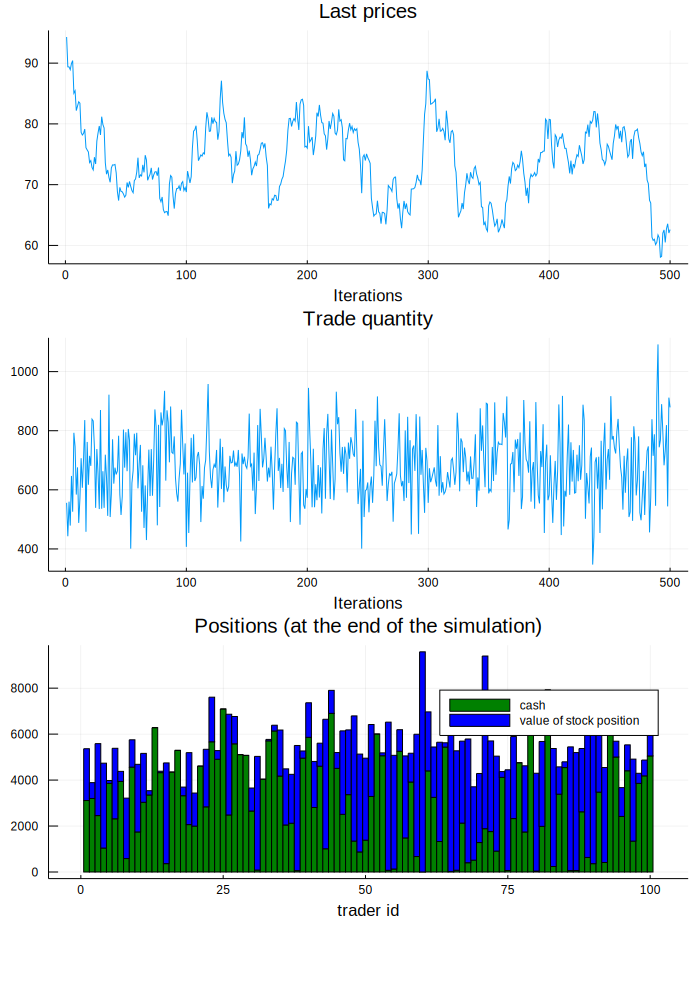

In [7]:
line_prices = plot(prices, label="", title="Last prices", xlabel="Iterations")
line_quantities = plot(quantities, label="", title="Trade quantity", xlabel="Iterations")
bar_positions = groupedbar(hcat(map(x-> x.cash, inv), map(x-> x.position * stock.last_price, inv))
    , bar_position = :stack, bar_width=1, labels=["cash", "value of stock position"], color = [:green :blue],
    title="Positions (at the end of the simulation)", xlabel="trader id")

plot(line_prices, line_quantities, bar_positions, layout = grid(3,1,heights=[0.3,0.3, 0.3]), size=[700,1000])

In [ ]:
# Derive Supply and Demand

n_iters = 300
starting_cash = 6000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95
prices = Array{Float64,1}()
inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

for price in 1:1:200
    counter_order = SellLimitOrder("PlaceHolder", price=price, quantity=9999999999)
    for inv in shuffle(inv)
        print(stock.last_price)
        place!(inv, stock)
        clear!(stock)

for n in 1:n_iters
    println("Placing...")
    for inv in shuffle(inv)
        print(stock.last_price)
        place!(inv, stock)
        clear!(stock)
        print("Price: $(stock.last_price)")
    end
    push!(prices, stock.last_price)

    if n < n_iters
        cancel!(stock)
    end
end


In [ ]:
sell_prices = unique(map(x -> x.price, stock.sell_limit_orders))
sell_quantities = [-sum(map(x-> x.quantity, filter(x -> x.price ==price, stock.sell_limit_orders))) for price in sell_prices]

buy_prices = unique(map(x -> x.price, stock.buy_limit_orders))
buy_quantities = [sum(map(x -> x.quantity, filter(x -> x.price ==price, stock.buy_limit_orders))) for price in buy_prices]

bar(
    sell_prices, 
    sell_quantities, 
    orientation=:horizontal, bar_width = 0.01, color=:red, label="Sell", linewidth=0, xlabel="Quantity (negative for sell)", ylabel="Price")

bar!(
    buy_prices, 
    buy_quantities, 
    orientation=:horizontal, bar_width = 0.01, color=:green, label="Buy", linewidth=0)
vline!([0], color=:black, label="")
title!("Order book")

In [ ]:
n_iters = 1
starting_cash = 4000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 90

prices = Array{Float64,1}()
inv = [Investor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

for inv in inv
    place!(inv, stock)
end



scatter(
    map(x-> x.quantity, stock.buy_limit_orders),
    map(x-> x.price, stock.buy_limit_orders),
    label="Buy", color=:green
)
scatter!(
    map(x-> -x.quantity, stock.sell_limit_orders),
    map(x-> x.price, stock.sell_limit_orders),
    label="Sell", color=:red
)
vline!([0], color="black", label="")
ps, qs = clear!(stock)

hline!([minimum(ps)], color=:green, label="Min price")
hline!([stock.last_price], color=:blue, label="Mean price")
hline!([maximum(ps)], color=:red, label="Max price")